   Channel  Counts
0        0       2
1        1       0
2        2       0
3        3       0
4        4       0


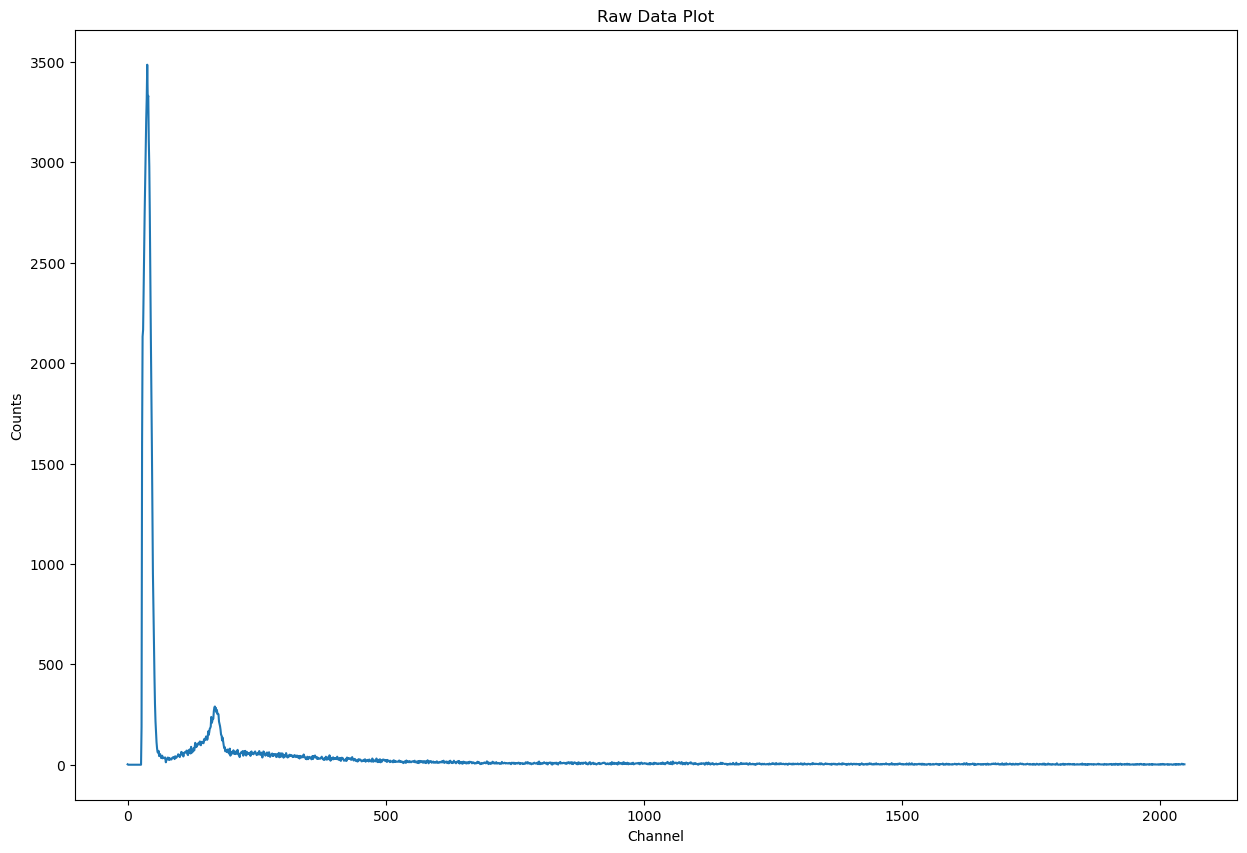

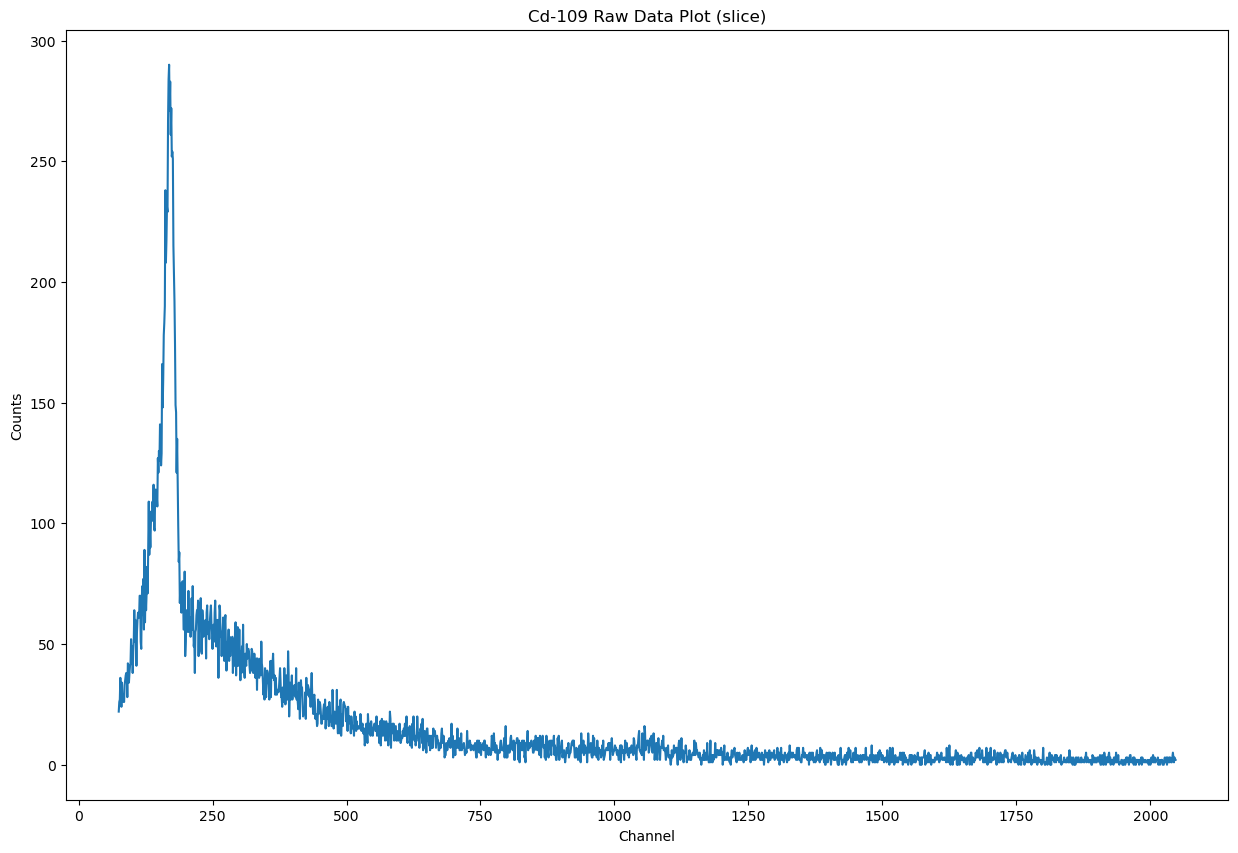

In [6]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class


##############
# Import data
##############

df_Cd_109 = pd.read_csv("Cd_109.csv") # create pandas dataframe
print(df_Cd_109.head()) # print first 5 rows


##############
# Plot data
##############

x_Cd_109 = df_Cd_109["Channel"] # grab column
y_Cd_109 = df_Cd_109["Counts"] # grab column
plt.figure(figsize=(15,10))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Raw Data Plot")
plt.plot(x_Cd_109, y_Cd_109)
plt.show()

x_Cd_109_slice = df_Cd_109["Channel"][75:] # grab column
y_Cd_109_slice = df_Cd_109["Counts"][75:] # grab column
plt.figure(figsize=(15,10))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Cd-109 Raw Data Plot (slice)")
plt.plot(x_Cd_109_slice, y_Cd_109_slice)
plt.show()

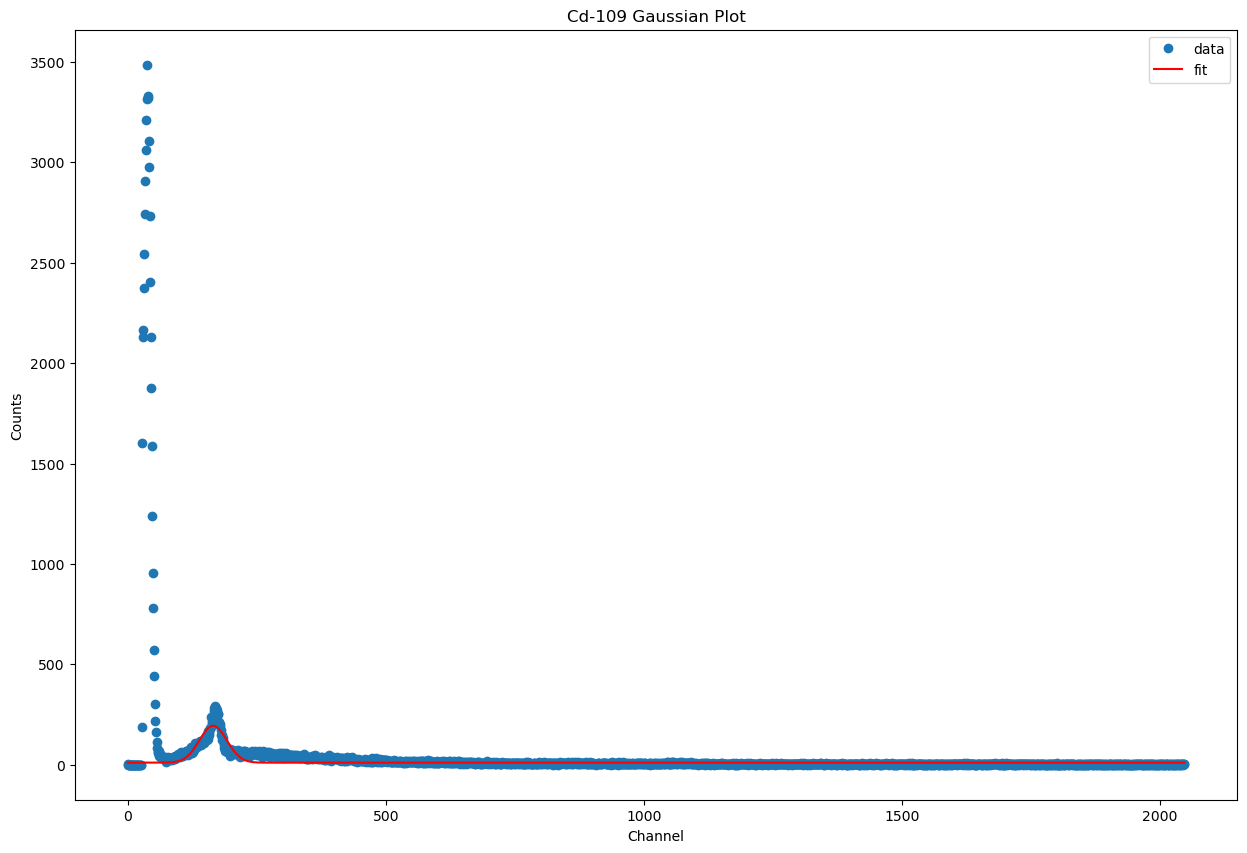

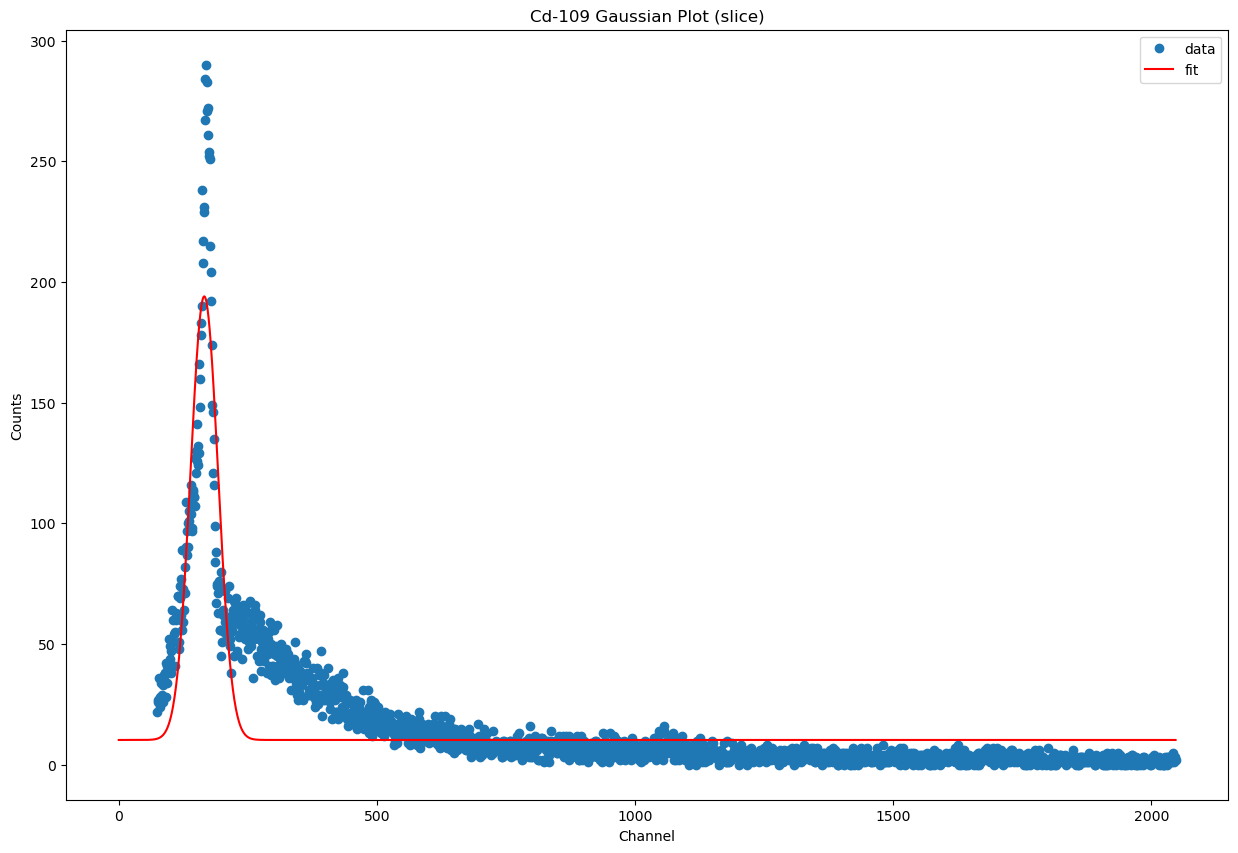

In [7]:
########################
# Input constant values
########################

a_Cd_109 = 290 # amplitude                   
mean_Cd_109 = 100 # middle of graph                 
h_Cd_109 = 40 # vertical shift                  
sigma_Cd_109 = 10 # width displacement


################################
# Define the Gaussian function
# takes in constants, solves 
# equation, returns value
################################

def gaus(x_Cd_109, a_Cd_109, mean_Cd_109, sigma_Cd_109, h_Cd_109):
    fit = a_Cd_109*np.exp((-(x_Cd_109-mean_Cd_109)**2)/(2*sigma_Cd_109**2)) + h_Cd_109
    return fit


#####################
# Fit the data using
# curve fit class
#####################

popt_Cd_109, pcov_Cd_109 = curve_fit(gaus, x_Cd_109_slice, y_Cd_109_slice, p0=[a_Cd_109, mean_Cd_109, sigma_Cd_109, h_Cd_109]) # solves for a, mean, sigma, h
y_Cd_109_fit = gaus(x_Cd_109, *popt_Cd_109) # creates y(x) = gaus function with fitted values


#################
# Plot Fit Curve
#################

plt.figure(figsize=(15,10))
plt.plot(x_Cd_109, y_Cd_109, 'o', label="data")
plt.plot(x_Cd_109, y_Cd_109_fit, 'r-', label='fit')
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Cd-109 Gaussian Plot")
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(x_Cd_109_slice, y_Cd_109_slice, 'o', label="data")
plt.plot(x_Cd_109, y_Cd_109_fit, 'r-', label='fit')
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Cd-109 Gaussian Plot (slice)")
plt.legend()
plt.show()

In [8]:
#####################
# Print fit data
# Print uncertainty
#####################
print("Fit Amplitude: ", popt_Cd_109[0],
      "\n Fit Mean: ", popt_Cd_109[1],
      "\n Fit Sigma (distance from mean to sides): ", popt_Cd_109[2],
      "\n Fit Height: ", popt_Cd_109[3])

print("\n Uncertainty matrix (uncertainties lie along diagonal): \n", pcov_Cd_109)

Fit Amplitude:  183.7751260367202 
 Fit Mean:  165.63024596656805 
 Fit Sigma (distance from mean to sides):  26.607876910862974 
 Fit Height:  10.257318656147785

 Uncertainty matrix (uncertainties lie along diagonal): 
 [[ 7.77375882e+00  8.04990639e-05 -7.24905514e-01 -9.41878886e-02]
 [ 8.04990639e-05  2.15440268e-01  1.60956347e-07 -5.96940316e-05]
 [-7.24905514e-01  1.60956347e-07  2.20936497e-01 -2.68674837e-02]
 [-9.41878886e-02 -5.96940316e-05 -2.68674837e-02  1.32241884e-01]]
